In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
# from timeit import default_timer as timer

In [2]:
# read
matrix_load = np.loadtxt('Example_0409.csv', dtype=np.int, delimiter=",")

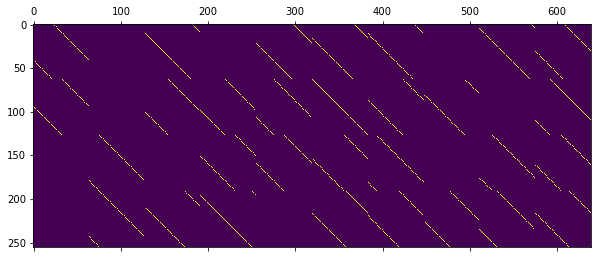

In [3]:
# Display matrix
plt.matshow(matrix_load)
plt.show()

In [4]:
# pre
col, row = matrix_load.shape
A = np.zeros((col+row, col+row))
A[:col, col:] = matrix_load[:,:]
A[col:, :col] = matrix_load.T[:,:]

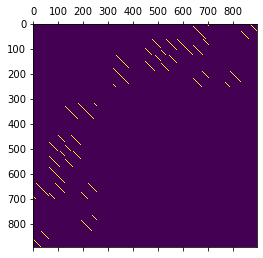

In [5]:
# Display matrix
plt.matshow(A)
plt.show()

# Display matrix
plt.matshow(A[:col, col:])
plt.show()

A[:col, col:] == matrix_load

In [6]:
G = nx.from_numpy_matrix(A, create_using=nx.Graph)

nx.bipartite.from_biadjacency_matrix(A)

## graph test

In [7]:
print(nx.bipartite.is_bipartite(G))

True


left, right = nx.bipartite.sets(G)

pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()

dict_G = nx.to_dict_of_dicts(G)

dict_G

In [8]:
list_G = nx.to_dict_of_lists(G)

list_G

In [10]:
type(list_G)

dict

nx.to_edgelist(G)

In [24]:
import graph_tool.all as gt

In [25]:
g = gt.Graph()

In [26]:
for v in list_G:
    for u in list_G[v]:
        g.add_edge(v, u)

In [27]:
all_circuits = gt.all_circuits(g)

In [ ]:
for c in gt.all_circuits(g):
    print(c)

matrix_load.shape

for j in range(col):
    for i in list_G[j]:
        if matrix_load[j, i-col] != 1:
            print(j, i, matrix_load[i, i-256])

for j in range(col):
    for i in list_G[j]:
        if A[j, i] != 1:
            print(j, i, matrix_load[i, i-256])

## compute test

all_cycles = nx.cycle_basis(G)

In [17]:
cycles = nx.find_cycle(G, orientation='ignore')

In [18]:
cycles

[(0, 278, 'forward'),
 (278, 117, 'forward'),
 (117, 400, 'forward'),
 (400, 27, 'forward'),
 (27, 305, 'forward'),
 (305, 80, 'forward'),
 (80, 427, 'forward'),
 (427, 54, 'forward'),
 (54, 268, 'forward'),
 (268, 107, 'forward'),
 (107, 390, 'forward'),
 (390, 17, 'forward'),
 (17, 295, 'forward'),
 (295, 70, 'forward'),
 (70, 417, 'forward'),
 (417, 44, 'forward'),
 (44, 258, 'forward'),
 (258, 97, 'forward'),
 (97, 444, 'forward'),
 (444, 7, 'forward'),
 (7, 285, 'forward'),
 (285, 124, 'forward'),
 (124, 407, 'forward'),
 (407, 34, 'forward'),
 (34, 312, 'forward'),
 (312, 87, 'forward'),
 (87, 434, 'forward'),
 (434, 61, 'forward'),
 (61, 275, 'forward'),
 (275, 114, 'forward'),
 (114, 397, 'forward'),
 (397, 24, 'forward'),
 (24, 302, 'forward'),
 (302, 77, 'forward'),
 (77, 424, 'forward'),
 (424, 51, 'forward'),
 (51, 265, 'forward'),
 (265, 104, 'forward'),
 (104, 387, 'forward'),
 (387, 14, 'forward'),
 (14, 292, 'forward'),
 (292, 67, 'forward'),
 (67, 414, 'forward'),
 (41

H = G.to_directed()

test = nx.simple_cycles(H)

test_4_14 = [np.sort(np.array(cycle)) for cycle in test if len(cycle) in range(4, 15)]

test_4_14

cycles_m = nx.minimum_cycle_basis(G)

nx.algorithms.tournament.hamiltonian_path(G)

nx.eulerian_circuit(G)

all_cycles.sort(key=lambda x : len(x))

len_all = [len(cycle) for cycle in all_cycles]

In [45]:
cycles_4_14 = [np.sort(np.array(cycle)) for cycle in cycles if len(cycle) in range(4, 15)]

cycles_yes

In [46]:
cycles_yes.sort(key=lambda x:x[0])
cycles_yes.sort(key=lambda x:len(x))

In [47]:
cycles_yes

[array([  4, 134, 138, 142, 193, 197, 627, 789, 793, 868, 872, 876]),
 array([  5,   9, 135, 180, 194, 235, 771, 790, 831, 850, 869, 873]),
 array([  5, 135, 139, 143, 194, 198, 628, 790, 794, 869, 873, 877]),
 array([  8, 138, 142, 146, 197, 201, 631, 793, 797, 872, 876, 880]),
 array([ 12, 142, 146, 150, 201, 205, 635, 797, 801, 876, 880, 884]),
 array([ 16, 146, 150, 154, 205, 209, 639, 801, 805, 880, 884, 888]),
 array([ 20, 150, 154, 158, 209, 213, 579, 805, 809, 884, 888, 892]),
 array([ 24, 154, 158, 162, 213, 217, 583, 809, 813, 832, 888, 892]),
 array([ 28, 158, 162, 166, 217, 221, 587, 813, 817, 832, 836, 892]),
 array([ 32, 162, 166, 170, 221, 225, 591, 817, 821, 832, 836, 840]),
 array([ 36, 166, 170, 174, 225, 229, 595, 821, 825, 836, 840, 844]),
 array([ 40, 170, 174, 178, 229, 233, 599, 825, 829, 840, 844, 848]),
 array([ 44, 174, 178, 182, 233, 237, 603, 769, 829, 844, 848, 852]),
 array([ 48, 178, 182, 186, 237, 241, 607, 769, 773, 848, 852, 856]),
 array([ 52, 182, 18

In [74]:
len(cycles_yes[0])

12

In [75]:
for j in range(len(cycles_yes)):
    for i in range(len(cycles_yes[j])):
        if A[j, i] != 1:
            print(j, i, matrix_load[j, i])

0 0 0
0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
0 6 0
0 7 0
0 8 0
0 9 0
0 10 0
0 11 0
1 0 0
1 1 0
1 2 0
1 3 0
1 4 0
1 5 0
1 6 0
1 7 0
1 8 0
1 9 0
1 10 0
1 11 0
2 0 0
2 1 0
2 2 0
2 3 0
2 4 0
2 5 0
2 6 0
2 7 0
2 8 0
2 9 0
2 10 0
2 11 0
3 0 0
3 1 0
3 2 0
3 3 0
3 4 0
3 5 0
3 6 0
3 7 0
3 8 0
3 9 0
3 10 0
3 11 0
4 0 0
4 1 0
4 2 0
4 3 0
4 4 0
4 5 0
4 6 0
4 7 0
4 8 0
4 9 0
4 10 0
4 11 0
5 0 0
5 1 0
5 2 0
5 3 0
5 4 0
5 5 0
5 6 0
5 7 0
5 8 0
5 9 0
5 10 0
5 11 0
6 0 0
6 1 0
6 2 0
6 3 0
6 4 0
6 5 0
6 6 0
6 7 0
6 8 0
6 9 0
6 10 0
6 11 0
7 0 0
7 1 0
7 2 0
7 3 0
7 4 0
7 5 0
7 6 0
7 7 0
7 8 0
7 9 0
7 10 0
7 11 0
8 0 0
8 1 0
8 2 0
8 3 0
8 4 0
8 5 0
8 6 0
8 7 0
8 8 0
8 9 0
8 10 0
8 11 0
9 0 0
9 1 0
9 2 0
9 3 0
9 4 0
9 5 0
9 6 0
9 7 0
9 8 0
9 9 0
9 10 0
9 11 0
10 0 0
10 1 0
10 2 0
10 3 0
10 4 0
10 5 0
10 6 0
10 7 0
10 8 0
10 9 0
10 10 0
10 11 0
11 0 0
11 1 0
11 2 0
11 3 0
11 4 0
11 5 0
11 6 0
11 7 0
11 8 0
11 9 0
11 10 0
11 11 0
12 0 0
12 1 0
12 2 0
12 3 0
12 4 0
12 5 0
12 6 0
12 7 0
12 8 0
12 9 0
12 10 0
12 11 0
13

In [48]:
cycles_tuple = [tuple(row) for row in cycles_yes]
cycles_tuple.sort
cycles_uniques = np.unique(cycles_tuple, axis=0)

In [49]:
cycles_uniques

array([[  4, 134, 138, 142, 193, 197, 627, 789, 793, 868, 872, 876],
       [  5,   9, 135, 180, 194, 235, 771, 790, 831, 850, 869, 873],
       [  5, 135, 139, 143, 194, 198, 628, 790, 794, 869, 873, 877],
       [  8, 138, 142, 146, 197, 201, 631, 793, 797, 872, 876, 880],
       [ 12, 142, 146, 150, 201, 205, 635, 797, 801, 876, 880, 884],
       [ 16, 146, 150, 154, 205, 209, 639, 801, 805, 880, 884, 888],
       [ 20, 150, 154, 158, 209, 213, 579, 805, 809, 884, 888, 892],
       [ 24, 154, 158, 162, 213, 217, 583, 809, 813, 832, 888, 892],
       [ 28, 158, 162, 166, 217, 221, 587, 813, 817, 832, 836, 892],
       [ 32, 162, 166, 170, 221, 225, 591, 817, 821, 832, 836, 840],
       [ 36, 166, 170, 174, 225, 229, 595, 821, 825, 836, 840, 844],
       [ 40, 170, 174, 178, 229, 233, 599, 825, 829, 840, 844, 848],
       [ 44, 174, 178, 182, 233, 237, 603, 769, 829, 844, 848, 852],
       [ 48, 178, 182, 186, 237, 241, 607, 769, 773, 848, 852, 856],
       [ 52, 182, 186, 190, 241, 2

In [50]:
len_cycles = [len(cycle) for cycle in cycles_uniques]
len_cycles.sort()
result = Counter(len_cycles)

In [51]:
print(result)

Counter({12: 15})
